In [23]:
# Importing the required libraries
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import os

# Set pandas display options
pd.set_option('display.max_colwidth', 150)
sns.set(style='whitegrid')

In [26]:
# Define the file paths
train_data_path = 'PUBHEALTH/train.tsv'
dev_data_path = 'PUBHEALTH/dev.tsv'
test_data_path = 'PUBHEALTH/test.tsv'

# Load the datasets
train_df = pd.read_csv(train_data_path, sep='\t')
dev_df = pd.read_csv(dev_data_path, sep='\t')
test_df = pd.read_csv(test_data_path, sep='\t')


# Display first few rows of the training dataset
print("Train Dataset:")
display(train_df.head())

# Display first few rows of the training dataset
print("Dev Dataset:")
display(dev_df.head())

# Display first few rows of the training dataset
print("Test Dataset:")
display(test_df.head())


# Display the column names to understand the structure
print("\nColumns in Train Dataset :", train_df.columns.tolist())
print("\nColumns in Dev Dataset :", dev_df.columns.tolist())
print("\nColumns in Test Dataset :", test_df.columns.tolist())

Train Dataset:


,claim_id,claim,date_published,explanation,fact_checkers,main_text,sources,label,subjects
0,15661,"""The money the Clinton Foundation took from from foreign governments while Hillary Clinton was secretary of state """"is clearly illegal. … The Cons...","April 26, 2015","""Gingrich said the Clinton Foundation """"took money from from foreign governments while (Hillary Clinton) was secretary of state. It is clearly ill...",Katie Sanders,"""Hillary Clinton is in the political crosshairs as the author of a new book alleges improper financial ties between her public and personal life. ...","https://www.wsj.com/articles/clinton-foundation-defends-acceptance-of-foreign-donations-1424302856, https://www.washingtonpost.com/politics/for-cl...",false,"Foreign Policy, PunditFact, Newt Gingrich,"
1,9893,Annual Mammograms May Have More False-Positives,"October 18, 2011","This article reports on the results of a study of nearly 170,000 women who had screening mammograms beginning between age 40-59. The study found t...",,"While the financial costs of screening mammography & false-positive recalls & biopsies were not included in the study, readers would benefit from ...",,mixture,"Screening,WebMD,women's health"
2,11358,SBRT Offers Prostate Cancer Patients High Cancer Control and Low Toxicity in Fewer Treatments,"September 28, 2016",This news release describes five-year outcomes for 309 men with early-stage prostate cancer who received stereotactic body radiation therapy (SBRT...,"Mary Chris Jaklevic,Steven J. Atlas, MD, MPH,Kathlyn Stone","The news release quotes lead researcher Robert Meier, MD, saying previous studies have shown SBRT to be “a cost-effective and faster alternative t...","https://www.healthnewsreview.org/wp-content/uploads/2016/09/iStock_371304_SMALL.jpg,https://www.healthnewsreview.org/wp-content/uploads/2016/09/AS...",mixture,"Association/Society news release,Cancer"
3,10166,"Study: Vaccine for Breast, Ovarian Cancer Has Potential","November 8, 2011","While the story does many things well, the overall framing of the story is that the vaccine “shows promise,” when the evidence actually points in ...",,"The story does discuss costs, but the framing is problematic. The story, based on a conversation with one source, the study’s lead investigator, s...",http://clinicaltrials.gov/ct2/results?term=cancer&recr=Open&no_unk=Y,true,"Cancer,WebMD,women's health"
4,11276,Some appendicitis cases may not require ’emergency’ surgery,"September 20, 2010",We really don’t understand why only a handful of mainstream news organizations reported this story. (At least in what we found.) The most common e...,,"""Although the story didn’t cite the cost of appendectomy – emergency or urgent surgery – and we wish it had, we nonetheless will give it a satisfa...",,true,


Dev Dataset:


,claim_id,claim,date_published,explanation,fact_checkers,main_text,sources,label,subjects
0,34656,A baby died at an unnamed medical facility because its parents refused to allow a black nurse to care for the child.,"November 10, 2015","Fellow Twitter users suggested @FierceFemtivist indicated she was from Louisville, Kentucky, prior to deleting her account. We were unable to loca...",Kim LaCapria,"On 8 November 2015, former Twitter user @FierceFemtivist published an alarming series of tweets about purportedly racist parents who allowed their...","http://webcache.googleusercontent.com/search?q=cache:ayn0Ddl2o8sJ:https://twitter.com/fiercefemtivist+&cd=1&hl=en&ct=clnk&gl=us, http://pediatrics...",unproven,"Politics, fiercefemtivist, racism"
1,3632,Bat from Shawnee County tests positive for rabies.,NaN,A bat found in northeastern Kansas has tested positive for rabies.,,Topeka television station KSNT reports that the bat was found in Shawnee County. The Shawnee County Health Department is urging residents to be aw...,https://www.ksnt.com/news/bat-tests-positive-for-rabies-in-shawnee-county/,true,"Rabies, Health, General News, Kansas, Bats, Topeka"
2,29558,Germany has banned pork from school canteens because it offends Muslim 'migrants.',"March 7, 2016","What's true: Some politicians complained that less pork was being served in Germany, diluting the country's culinary cultural heritage. What's fal...",Kim LaCapria,"On 7 March 2016, British tabloid Express reported that some German cafes and schools were phasing out pork products. The headline (“GERMANY BANS S...","http://bnp.org.uk/news/regional/bnp-victory-brinsworth-rotherham, http://www.snopes.com/politics/religion/peppapig.asp, http://www.snopes.com/dead...",false,Politics
3,8416,Coronavirus prompts Canada to roll out safe drugs for street users.,"April 16, 2020","Canada’s Pacific province of British Columbia was already battling an opioid epidemic when the new coronavirus hit, compounding the threat to drug...",Tessa Vikander,"In March, the Canadian government urged provinces to lower barriers to prescription medications - allowing doctors to provide prescriptions for co...",,true,Health News
4,7169,"Wayne National Forest plans fires for tree, wildlife health.",NaN,"Nearly 2,000 acres of Wayne National Forest in Ohio will be intentionally burned over the next three months as part of the area’s fire management ...",,"Forest officials say scientists who study native plants, birds and other wildlife believe prescribed fire helps maintain healthy oak forests. They...",,true,"Plants, Wildlife, Health, Wildlife health, Forests, Trees, Fires, Ohio, Controlled burns"


Test Dataset:


,Unnamed: 0,claim_id,claim,date_published,explanation,fact_checkers,main_text,sources,label,subjects
0,0,33456,A mother revealed to her child in a letter after her death that she had just one eye because she had donated the other to him.,"November 6, 2011","The one-eyed mother story expounds upon two moral messages: the unconditional, all-encompassing love we expect mothers to always feel for their ch...",David Mikkelson,"In April 2005, we spotted a tearjerker on the Internet about a mother who gave up one of her eyes to a son who had lost one of his at an early age...",,false,Glurge Gallery
1,1,2542,Study says too many Americans still drink too much.,"February 25, 2013","On any given day in the United States, 18 percent of men and 11 percent of women drink more alcohol than federal guidelines recommend, according t...",,"That means the great majority of Americans stay within the advised limit of two drinks a day for men and one for women, according to the study tha...",http://bit.ly/X1NVtW,true,Health News
2,2,26678,"Viral image Says 80% of novel coronavirus cases are ""mild.","March 13, 2020","The website Information is Beautiful published a chart showing that 80.9% of novel coronavirus cases are ""mild."" PolitiFact couldn't find credible...",Paul Specht,"Amid the spread of the novel coronavirus, many people are wondering how likely they are to get it. Often, their second question is: If I get coron...","https://www.facebook.com/informationisbeautiful/photos/a.10157864012508418/10157864012758418/?type=3&theater, https://www.who.int/docs/default-sou...",true,"Facebook Fact-checks, Coronavirus, Viral image,"
3,3,40705,"An email says that 9-year old Craig Shergold of Carshalton, Great Britain is dying of Cancer. As a dying wish, he wants to get into the Guinness ...","March 16, 2015",Send greeting or business cards to cancer victim Craig Shergold,Rich Buhler & Staff,"Craig Shergold is real and in 1989 when he was 9-years old, a campaign was started on his behalf to try to break the Guinn...","https://www.reddit.com/submit?url=https%3A%2F%2Fwww.truthorfiction.com%2Fcraigshergold%2F, https://www.truthorfiction.com/category/inspirational/,...",false,"Inspirational, Pleas"
4,4,35718,"Employees at a Five Guys restaurant in Daphne, Alabama, refused to serve local police officers.","July 15, 2020","What's undetermined: As of this writing, Five Guys has not explicitly corroborated the police version of events.",Dan MacGuill,"In July 2020, amid a new wave of nationwide protests over racial injustice and police brutality, readers asked us to examine the accuracy of news ...",,unproven,Law Enforcement



Columns in Train Dataset : ['claim_id', 'claim', 'date_published', 'explanation', 'fact_checkers', 'main_text', 'sources', 'label', 'subjects']

Columns in Dev Dataset : ['claim_id', 'claim', 'date_published', 'explanation', 'fact_checkers', 'main_text', 'sources', 'label', 'subjects']

Columns in Test Dataset : ['Unnamed: 0', 'claim_id', 'claim', 'date_published', 'explanation', 'fact_checkers', 'main_text', 'sources', 'label', 'subjects']


In [27]:
def clean_text(text):
    """
    Cleans text by:
    - Converting to lowercase
    - Removing punctuation
    - Removing numbers
    - Removing extra spaces
    """
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(f"[{string.punctuation}]", " ", text)
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'\s+', ' ', text)
        return text.strip()
    return text

# Testing the cleaning function
sample_text = "COVID-19 Vaccine is 90% effective! #Health, #Pandemic"
cleaned_text = clean_text(sample_text)
print("Original text:", sample_text)
print("Cleaned text:", cleaned_text)

Original text: COVID-19 Vaccine is 90% effective! #Health, #Pandemic
Cleaned text: covid vaccine is effective health pandemic


In [28]:
# Apply cleaning to the datasets
train_df = train_df.copy()
dev_df = dev_df.copy()
test_df = test_df.copy()

train_df['claim_cleaned'] = train_df['claim'].apply(clean_text)
train_df['explanation_cleaned'] = train_df['explanation'].apply(clean_text)
train_df['main_text_cleaned'] = train_df['main_text'].apply(clean_text)

dev_df['claim_cleaned'] = dev_df['claim'].apply(clean_text)
dev_df['explanation_cleaned'] = dev_df['explanation'].apply(clean_text)
dev_df['main_text_cleaned'] = dev_df['main_text'].apply(clean_text)

test_df['claim_cleaned'] = test_df['claim'].apply(clean_text)
test_df['explanation_cleaned'] = test_df['explanation'].apply(clean_text)
test_df['main_text_cleaned'] = test_df['main_text'].apply(clean_text)

# Display all columns
print("Columns in Train Dataset:", train_df.columns.tolist())
print("Columns in Dev Dataset:", dev_df.columns.tolist())
print("Columns in Test Dataset:", test_df.columns.tolist())

Columns in Train Dataset: ['claim_id', 'claim', 'date_published', 'explanation', 'fact_checkers', 'main_text', 'sources', 'label', 'subjects', 'claim_cleaned', 'explanation_cleaned', 'main_text_cleaned']
Columns in Dev Dataset: ['claim_id', 'claim', 'date_published', 'explanation', 'fact_checkers', 'main_text', 'sources', 'label', 'subjects', 'claim_cleaned', 'explanation_cleaned', 'main_text_cleaned']
Columns in Test Dataset: ['Unnamed: 0', 'claim_id', 'claim', 'date_published', 'explanation', 'fact_checkers', 'main_text', 'sources', 'label', 'subjects', 'claim_cleaned', 'explanation_cleaned', 'main_text_cleaned']


In [29]:
# Display first few rows of the cleaned dataset
print("\nCleaned Train Dataset Sample:")
display(train_df.head())
print("\nCleaned Dev Dataset Sample:")
display(dev_df.head())
print("\nCleaned Test Dataset Sample:")
display(test_df.head())


Cleaned Train Dataset Sample:


,claim_id,claim,date_published,explanation,fact_checkers,main_text,sources,label,subjects,claim_cleaned,explanation_cleaned,main_text_cleaned
0,15661,"""The money the Clinton Foundation took from from foreign governments while Hillary Clinton was secretary of state """"is clearly illegal. … The Cons...","April 26, 2015","""Gingrich said the Clinton Foundation """"took money from from foreign governments while (Hillary Clinton) was secretary of state. It is clearly ill...",Katie Sanders,"""Hillary Clinton is in the political crosshairs as the author of a new book alleges improper financial ties between her public and personal life. ...","https://www.wsj.com/articles/clinton-foundation-defends-acceptance-of-foreign-donations-1424302856, https://www.washingtonpost.com/politics/for-cl...",false,"Foreign Policy, PunditFact, Newt Gingrich,",the money the clinton foundation took from from foreign governments while hillary clinton was secretary of state is clearly illegal … the constitu...,gingrich said the clinton foundation took money from from foreign governments while hillary clinton was secretary of state it is clearly illegal …...,hillary clinton is in the political crosshairs as the author of a new book alleges improper financial ties between her public and personal life at...
1,9893,Annual Mammograms May Have More False-Positives,"October 18, 2011","This article reports on the results of a study of nearly 170,000 women who had screening mammograms beginning between age 40-59. The study found t...",,"While the financial costs of screening mammography & false-positive recalls & biopsies were not included in the study, readers would benefit from ...",,mixture,"Screening,WebMD,women's health",annual mammograms may have more false positives,this article reports on the results of a study of nearly women who had screening mammograms beginning between age the study found that over ten ye...,while the financial costs of screening mammography false positive recalls biopsies were not included in the study readers would benefit from being...
2,11358,SBRT Offers Prostate Cancer Patients High Cancer Control and Low Toxicity in Fewer Treatments,"September 28, 2016",This news release describes five-year outcomes for 309 men with early-stage prostate cancer who received stereotactic body radiation therapy (SBRT...,"Mary Chris Jaklevic,Steven J. Atlas, MD, MPH,Kathlyn Stone","The news release quotes lead researcher Robert Meier, MD, saying previous studies have shown SBRT to be “a cost-effective and faster alternative t...","https://www.healthnewsreview.org/wp-content/uploads/2016/09/iStock_371304_SMALL.jpg,https://www.healthnewsreview.org/wp-content/uploads/2016/09/AS...",mixture,"Association/Society news release,Cancer",sbrt offers prostate cancer patients high cancer control and low toxicity in fewer treatments,this news release describes five year outcomes for men with early stage prostate cancer who received stereotactic body radiation therapy sbrt whic...,the news release quotes lead researcher robert meier md saying previous studies have shown sbrt to be “a cost effective and faster alternative to ...
3,10166,"Study: Vaccine for Breast, Ovarian Cancer Has Potential","November 8, 2011","While the story does many things well, the overall framing of the story is that the vaccine “shows promise,” when the evidence actually points in ...",,"The story does discuss costs, but the framing is problematic. The story, based on a conversation with one source, the study’s lead investigator, s...",http://clinicaltrials.gov/ct2/results?term=cancer&recr=Open&no_unk=Y,true,"Cancer,WebMD,women's health",study vaccine for breast ovarian cancer has potential,while the story does many things well the overall framing of the story is that the vaccine “shows promise ” when the evidence actually points in t...,the story does discuss costs but the framing is problematic the story based on a conversation with one source the study’s lead investigator says “...
4,11


Cleaned Dev Dataset Sample:


,claim_id,claim,date_published,explanation,fact_checkers,main_text,sources,label,subjects,claim_cleaned,explanation_cleaned,main_text_cleaned
0,34656,A baby died at an unnamed medical facility because its parents refused to allow a black nurse to care for the child.,"November 10, 2015","Fellow Twitter users suggested @FierceFemtivist indicated she was from Louisville, Kentucky, prior to deleting her account. We were unable to loca...",Kim LaCapria,"On 8 November 2015, former Twitter user @FierceFemtivist published an alarming series of tweets about purportedly racist parents who allowed their...","http://webcache.googleusercontent.com/search?q=cache:ayn0Ddl2o8sJ:https://twitter.com/fiercefemtivist+&cd=1&hl=en&ct=clnk&gl=us, http://pediatrics...",unproven,"Politics, fiercefemtivist, racism",a baby died at an unnamed medical facility because its parents refused to allow a black nurse to care for the child,fellow twitter users suggested fiercefemtivist indicated she was from louisville kentucky prior to deleting her account we were unable to locate a...,on november former twitter user fiercefemtivist published an alarming series of tweets about purportedly racist parents who allowed their child to...
1,3632,Bat from Shawnee County tests positive for rabies.,NaN,A bat found in northeastern Kansas has tested positive for rabies.,,Topeka television station KSNT reports that the bat was found in Shawnee County. The Shawnee County Health Department is urging residents to be aw...,https://www.ksnt.com/news/bat-tests-positive-for-rabies-in-shawnee-county/,true,"Rabies, Health, General News, Kansas, Bats, Topeka",bat from shawnee county tests positive for rabies,a bat found in northeastern kansas has tested positive for rabies,topeka television station ksnt reports that the bat was found in shawnee county the shawnee county health department is urging residents to be awa...
2,29558,Germany has banned pork from school canteens because it offends Muslim 'migrants.',"March 7, 2016","What's true: Some politicians complained that less pork was being served in Germany, diluting the country's culinary cultural heritage. What's fal...",Kim LaCapria,"On 7 March 2016, British tabloid Express reported that some German cafes and schools were phasing out pork products. The headline (“GERMANY BANS S...","http://bnp.org.uk/news/regional/bnp-victory-brinsworth-rotherham, http://www.snopes.com/politics/religion/peppapig.asp, http://www.snopes.com/dead...",false,Politics,germany has banned pork from school canteens because it offends muslim migrants,what s true some politicians complained that less pork was being served in germany diluting the country s culinary cultural heritage what s false ...,on march british tabloid express reported that some german cafes and schools were phasing out pork products the headline “germany bans sausages” n...
3,8416,Coronavirus prompts Canada to roll out safe drugs for street users.,"April 16, 2020","Canada’s Pacific province of British Columbia was already battling an opioid epidemic when the new coronavirus hit, compounding the threat to drug...",Tessa Vikander,"In March, the Canadian government urged provinces to lower barriers to prescription medications - allowing doctors to provide prescriptions for co...",,true,Health News,coronavirus prompts canada to roll out safe drugs for street users,canada’s pacific province of british columbia was already battling an opioid epidemic when the new coronavirus hit compounding the threat to drug ...,in march the canadian government urged provinces to lower barriers to prescription medications allowing doctors to provide prescriptions for contr...
4,7169,"Wayne National Forest plans fires for tree, wildlife health.",NaN,"Nearly 2,000 acres of Wayne National Forest in Ohio will be intentionally burned over the next three months as part of the area’s fire management ...",,"Forest officials say scientists who study native plants, birds and other wildlife believe prescribed fire hel


Cleaned Test Dataset Sample:


,Unnamed: 0,claim_id,claim,date_published,explanation,fact_checkers,main_text,sources,label,subjects,claim_cleaned,explanation_cleaned,main_text_cleaned
0,0,33456,A mother revealed to her child in a letter after her death that she had just one eye because she had donated the other to him.,"November 6, 2011","The one-eyed mother story expounds upon two moral messages: the unconditional, all-encompassing love we expect mothers to always feel for their ch...",David Mikkelson,"In April 2005, we spotted a tearjerker on the Internet about a mother who gave up one of her eyes to a son who had lost one of his at an early age...",,false,Glurge Gallery,a mother revealed to her child in a letter after her death that she had just one eye because she had donated the other to him,the one eyed mother story expounds upon two moral messages the unconditional all encompassing love we expect mothers to always feel for their chil...,in april we spotted a tearjerker on the internet about a mother who gave up one of her eyes to a son who had lost one of his at an early age by fe...
1,1,2542,Study says too many Americans still drink too much.,"February 25, 2013","On any given day in the United States, 18 percent of men and 11 percent of women drink more alcohol than federal guidelines recommend, according t...",,"That means the great majority of Americans stay within the advised limit of two drinks a day for men and one for women, according to the study tha...",http://bit.ly/X1NVtW,true,Health News,study says too many americans still drink too much,on any given day in the united states percent of men and percent of women drink more alcohol than federal guidelines recommend according to a stud...,that means the great majority of americans stay within the advised limit of two drinks a day for men and one for women according to the study that...
2,2,26678,"Viral image Says 80% of novel coronavirus cases are ""mild.","March 13, 2020","The website Information is Beautiful published a chart showing that 80.9% of novel coronavirus cases are ""mild."" PolitiFact couldn't find credible...",Paul Specht,"Amid the spread of the novel coronavirus, many people are wondering how likely they are to get it. Often, their second question is: If I get coron...","https://www.facebook.com/informationisbeautiful/photos/a.10157864012508418/10157864012758418/?type=3&theater, https://www.who.int/docs/default-sou...",true,"Facebook Fact-checks, Coronavirus, Viral image,",viral image says of novel coronavirus cases are mild,the website information is beautiful published a chart showing that of novel coronavirus cases are mild politifact couldn t find credible studies ...,amid the spread of the novel coronavirus many people are wondering how likely they are to get it often their second question is if i get coronavir...
3,3,40705,"An email says that 9-year old Craig Shergold of Carshalton, Great Britain is dying of Cancer. As a dying wish, he wants to get into the Guinness ...","March 16, 2015",Send greeting or business cards to cancer victim Craig Shergold,Rich Buhler & Staff,"Craig Shergold is real and in 1989 when he was 9-years old, a campaign was started on his behalf to try to break the Guinn...","https://www.reddit.com/submit?url=https%3A%2F%2Fwww.truthorfiction.com%2Fcraigshergold%2F, https://www.truthorfiction.com/category/inspirational/,...",false,"Inspirational, Pleas",an email says that year old craig shergold of carshalton great britain is dying of cancer as a dying wish he wants to get into the guinness book o...,send greeting or business cards to cancer victim craig shergold,craig shergold is real and in when he was years old a campaign was started on his behalf to try to break the guinness world record for greeting ca...
4,4,35718,"Employees at a Five Guys restaurant in Daphne, Alabama, refused to serve local police officers.","July 15, 2020","What's undetermined: As of this writing, Five Guys has not explicitly corroborated the police version of events.",Dan Mac

In [31]:
# Check for missing values
print("Missing Values in Train Dataset:")
print(train_df.isnull().sum())
print("Missing Values in Dev Dataset:")
print(dev_df.isnull().sum())
print("Missing Values in Test Dataset:")
print(test_df.isnull().sum())

Missing Values in Train Dataset:
claim_id                  0
claim                     8
date_published         1937
explanation               8
fact_checkers            11
main_text                26
sources                  28
label                    27
subjects                 28
claim_cleaned             8
explanation_cleaned       8
main_text_cleaned        26
dtype: int64
Missing Values in Dev Dataset:
claim_id                 0
claim                    2
date_published         245
explanation              2
fact_checkers            4
main_text                4
sources                  5
label                    6
subjects                 7
claim_cleaned            2
explanation_cleaned      2
main_text_cleaned        4
dtype: int64
Missing Values in Test Dataset:
Unnamed: 0               0
claim_id                 0
claim                    0
date_published         226
explanation              0
fact_checkers            0
main_text                0
sources                  0
la

In [32]:
# Drop missing values
train_df.dropna(subset=['claim_cleaned', 'explanation_cleaned', 'main_text_cleaned'], inplace=True)
dev_df.dropna(subset=['claim_cleaned', 'explanation_cleaned', 'main_text_cleaned'], inplace=True)
test_df.dropna(subset=['claim_cleaned', 'explanation_cleaned', 'main_text_cleaned'], inplace=True)

In [33]:
print("Missing Values in Train Dataset:")
print(train_df.isnull().sum())


Missing Values in Train Dataset:
claim_id                  0
claim                     0
date_published         1929
explanation               0
fact_checkers             0
main_text                 0
sources                   2
label                     1
subjects                  2
claim_cleaned             0
explanation_cleaned       0
main_text_cleaned         0
dtype: int64


In [34]:
# Confirm no missing values
print("\nAfter Dropping Missing Values:")
print("Train:", train_df.shape)
print("Dev:", dev_df.shape)
print("Test:", test_df.shape)


After Dropping Missing Values:
Train: (9806, 12)
Dev: (1217, 12)
Test: (1235, 13)


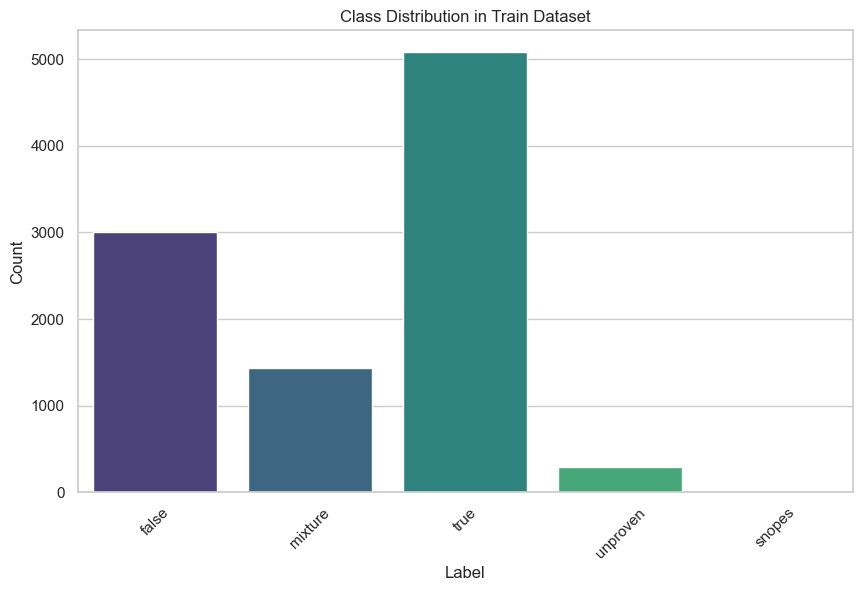

Class Distribution in Train Dataset (%):
label
true        51.789903
false       30.606833
mixture     14.625191
unproven     2.967874
snopes       0.010199
Name: proportion, dtype: float64


In [36]:
# Plot class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='label', hue='label', palette='viridis', legend=False)
plt.title('Class Distribution in Train Dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Display class distribution percentages
class_distribution = train_df['label'].value_counts(normalize=True) * 100
print("Class Distribution in Train Dataset (%):")
print(class_distribution)

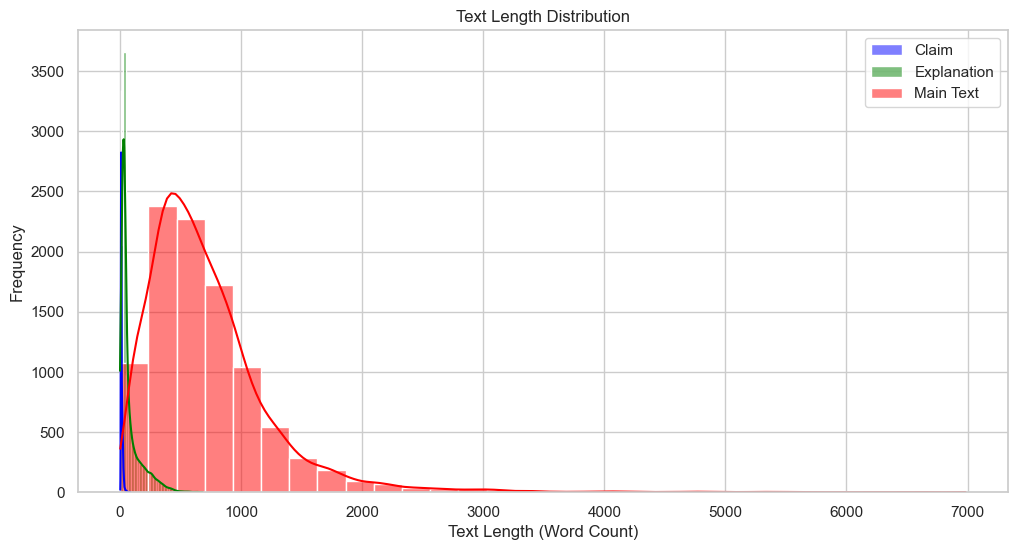

In [37]:
# Function to calculate text length
def text_length(text):
    return len(text.split()) if isinstance(text, str) else 0

# Compute text lengths
train_df['claim_length'] = train_df['claim_cleaned'].apply(text_length)
train_df['explanation_length'] = train_df['explanation_cleaned'].apply(text_length)
train_df['main_text_length'] = train_df['main_text_cleaned'].apply(text_length)

# Plot text length distribution
plt.figure(figsize=(12, 6))
sns.histplot(train_df['claim_length'], bins=30, color='blue', label='Claim', kde=True)
sns.histplot(train_df['explanation_length'], bins=30, color='green', label='Explanation', kde=True)
sns.histplot(train_df['main_text_length'], bins=30, color='red', label='Main Text', kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length (Word Count)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

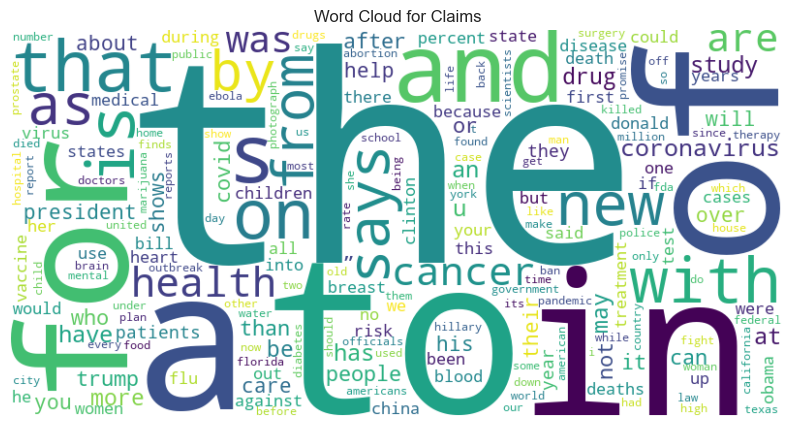

In [38]:
# Function to get word frequency
def get_word_frequency(text_series):
    all_words = ' '.join(text_series.dropna()).split()
    word_freq = Counter(all_words)
    return word_freq

# Compute word frequencies for claims
claim_word_freq = get_word_frequency(train_df['claim_cleaned'])

# Generate Word Cloud
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(claim_word_freq)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Claims')
plt.axis('off')
plt.show()

In [46]:
# Define new save directory (writable)
save_dir = "./processed"  # Saves inside your current working directory
os.makedirs(save_dir, exist_ok=True)

# Save cleaned datasets
train_df.to_csv(f"{save_dir}/train_cleaned.csv", index=False)
dev_df.to_csv(f"{save_dir}/dev_cleaned.csv", index=False)
test_df.to_csv(f"{save_dir}/test_cleaned.csv", index=False)

print(f"Cleaned datasets saved successfully in {save_dir}!")

Cleaned datasets saved successfully in ./processed!
